In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [55]:
def make_model(model_shape):
    # print(model_shape)
    # print(model_shape.shape[1])
    # normal = Normalization(input_shape=[model_shape.shape[1],], axis=None)
    # normal.adapt(model_shape)
    model = Sequential()
    # model.add(normal)
    model.add(Dense(units=256, activation="relu", input_shape=[model_shape.shape[1],]))
    model.add(Dense(units=256, activation="relu"))
    model.add(Dense(units=256, activation="relu"))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=1))
    # model.add(Dense(units=1000000, activation="relu"))
    # model.add(Dense(units=10, activation="relu"))
    # RED WINE
    # model.add(Dense(units=4, input_shape=(model_shape.shape[1],), activation="relu"))
    # model.add(Dense(units=8, activation="relu"))
    # model.add(Dense(units=16, activation="relu"))
    # model.add(Dense(units=32, activation="relu"))
    # model.add(Dense(units=64, activation="relu"))
    # model.add(Dense(units=128, activation="relu"))
    # model.add(Dense(units=98, activation="relu"))
    # model.add(Dense(units=46, activation="relu"))
    # model.add(Dense(units=32, activation="relu"))
    # model.add(Dense(units=12, activation="relu"))
    # model.add(Dense(units=10, activation="relu"))
    optimizer = RMSprop(0.001)
    model.compile(optimizer=optimizer, metrics=['mae', 'mse'], loss='mae')
    #model.compile(optimizer="adam", metrics=['accuracy'], loss='binary_crossentropy')
    model.summary()
    return model

In [56]:
def map_column_to_int(df, column_name, values):
    arr_size = len(values)
    for x in range(arr_size):
        df.loc[df[column_name] == values[x], column_name] = float(x)

In [57]:
def load_and_purge_data():
    raw_data = pd.read_csv("vehicles.csv")
    picked_columns = raw_data[["price", "year", "odometer", "manufacturer", "condition", "type", "fuel", "transmission", "drive"]]
    data_without_nulls = picked_columns.dropna(axis=0)
    map_column_to_int(data_without_nulls, "manufacturer", ['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'fiat', 'mini', 'saturn', 'pontiac', 'tesla', 'harley-davidson', 'mercury', 'datsun', 'aston-martin', 'land rover', 'morgan'])
    map_column_to_int(data_without_nulls, "condition", ['good', 'excellent', 'fair', 'like new', 'new', 'salvage'])
    map_column_to_int(data_without_nulls, "type", ['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback', 'mini-van', 'sedan', 'offroad', 'van', 'convertible', 'wagon', 'bus'])
    map_column_to_int(data_without_nulls, "fuel", ['gas', 'other', 'diesel', 'hybrid', 'electric'])
    map_column_to_int(data_without_nulls, "transmission", ['automatic', 'other', 'manual'])
    map_column_to_int(data_without_nulls, "drive", ['rwd', '4wd', 'fwd'])
    data_without_nulls = data_without_nulls.apply(pd.to_numeric)
    return data_without_nulls

In [58]:
def split_data(data, valid_col):
    size = len(data.index)
    p7 = int((70 * size) / 100)
    p2 = int((20 * size) / 100)
    p1 = int((10 * size) / 100)
    v_col = data[[valid_col]]
    data = data.drop(valid_col, axis=1)
    part1 = data[1 : p7]
    part2 = data[p7 : p7+p2]
    part3 = data[p7+p2 : p7+p2+p1]
    part1_v_col = v_col[1 : p7]
    part2_v_col = v_col[p7 : p7+p2]
    part3_v_col = v_col[p7+p2 : p7+p2+p1]
    return part1, part2, part3, part1_v_col, part2_v_col, part3_v_col

In [59]:
def data_splitter(data_x, data_y):
    return train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [60]:
def red_wine_load():
    wine_raw_data = pd.read_csv("winequality-red.csv")
    rw_x = wine_raw_data.drop('quality', axis=1)
    rw_y = wine_raw_data['quality']
    rw_x_train, rw_x_test, rw_y_train, rw_y_test = train_test_split(rw_x, rw_y, test_size=0.3, random_state=1)
    return rw_x_train, rw_x_test, rw_y_train, rw_y_test

In [61]:
def draw_learning_progress(hist):
    plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
    plotter.plot({'Basic': hist}, metric = "mae")
    plt.ylim([0, 20000])
    plt.ylabel('MAE [Price]')

In [62]:
def draw_prediction_graph(model, val_data_x, val_data_y):
    test_predictions = model.predict(val_data_x).flatten()
    a = plt.axes(aspect='equal')
    plt.scatter(val_data_y, test_predictions)
    plt.xlabel('True Values [Price]')
    plt.ylabel('Predictions [Price]')
    lims = [0, 100000]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

In [63]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [64]:
# RED WINE
# w_x_train, w_x_test, w_y_train, w_y_test = red_wine_load()
# w_r_data = pd.read_csv("winequality-red.csv")
# w_x_train, w_x_test, w_x_val, w_y_train, w_y_test, w_y_val = split_data(w_r_data, "quality")
# mdl = make_model(w_x_train)
# history = mdl.fit(w_x_train, w_y_train, batch_size=32, epochs=100, validation_data=(w_x_test, w_y_test))
# results = mdl.evaluate(w_x_val, w_y_val, batch_size=128)
# print("test loss, test acc:", results)

# CARS
# cars_f = load_and_purge_data()
# val_col = cars_f[["price"]]
# cars_f = cars_f.drop("price", axis=1)
# x_train, x_test, y_train, y_test = data_splitter(cars_f, val_col)
ld = load_and_purge_data()
x_train, x_test, x_val, y_train, y_test, y_val = split_data(ld, "price")

train_stats = x_train.describe(include= 'all')
train_stats = train_stats.transpose()

norm_x_train = norm(x_train)
norm_x_test = norm(x_test)
norm_x_val = norm(x_val)

mdl = make_model(norm_x_train)
history = mdl.fit(norm_x_train, y_train, batch_size=128, epochs=1000, validation_data=(norm_x_test, y_test))
draw_learning_progress(history)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 256)               2304      
                                                                 
 dense_111 (Dense)           (None, 256)               65792     
                                                                 
 dense_112 (Dense)           (None, 256)               65792     
                                                                 
 dense_113 (Dense)           (None, 128)               32896     
                                                                 
 dense_114 (Dense)           (None, 128)               16512     
                                                                 
 dense_115 (Dense)           (None, 128)               16512     
                                                                 
 dense_116 (Dense)           (None, 64)              

KeyboardInterrupt: 

1317/1317 [==============================] - 1s 551us/step


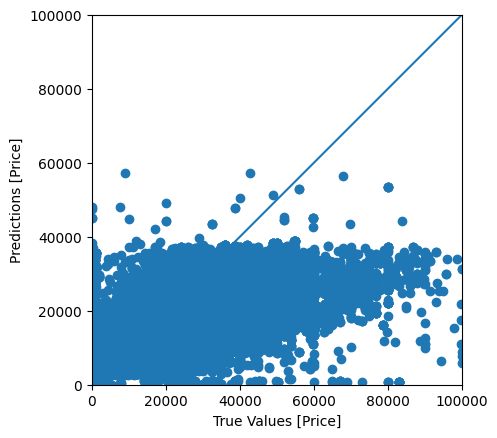

In [11]:
draw_prediction_graph(mdl, norm_x_val, y_val)